
# Análisis Exploratorio de Datos (EDA) para Steam


El objetivo de este notebook es realizar un análisis exploratorio de datos (EDA) profundo sobre los conjuntos de datos proporcionados por Steam, que incluyen información sobre juegos (`steam_games`), reseñas de usuarios (`user_reviews`), e interacciones de usuarios con juegos (`users_items`). Este análisis nos ayudará a comprender mejor las características de los datos, identificar tendencias y patrones, y prepararnos para las siguientes etapas del proyecto, que incluyen el desarrollo de un sistema de recomendación de videojuegos.



librerías requeridas

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import missingno as msno

## Exploración inicial

In [20]:
steam_games = pd.read_pickle('../Data/steam_games.pkl')
user_reviews = pd.read_pickle('../Data/user_reviews.pkl')
users_items = pd.read_pickle('../Data/users_items.pkl')


## Análisis de valores nulos

In [21]:

print("Valores nulos en steam_games:")
print(steam_games.isnull().sum())
print("\nValores nulos en user_reviews:")
print(user_reviews.isnull().sum())
print("\nValores nulos en users_items:")
print(users_items.isnull().sum())


Valores nulos en steam_games:
genres          0
app_name        0
release_date    0
price           0
id              0
developer       0
release_year    0
dtype: int64

Valores nulos en user_reviews:
user_id               0
posted                0
item_id               0
recommend             0
review                0
year                  0
sentiment_analysis    0
dtype: int64

Valores nulos en users_items:
user_id             0
item_id             0
playtime_forever    0
dtype: int64


## Análisis de valores Duplicados

In [23]:
print("Valores duplicados en steam_games:")
print(steam_games.duplicated().sum())

# Verificar valores duplicados en user_reviews
print("\nValores duplicados en user_reviews:")
print(user_reviews.duplicated().sum())

# Verificar valores duplicados en users_items
print("\nValores duplicados en users_items:")
print(users_items.duplicated().sum())

Valores duplicados en steam_games:
0

Valores duplicados en user_reviews:
0

Valores duplicados en users_items:
0


## Análisis de valores Faltantes

In [27]:
# Verificar valores faltantes en steam_games
print("Valores faltantes en steam_games:")
print((steam_games.apply(lambda x: x.isin(['', ' ', None]).sum())).sort_values(ascending=False))

# Verificar valores faltantes en user_reviews
print("\nValores faltantes en user_reviews:")
print((user_reviews.apply(lambda x: x.isin(['', ' ', None]).sum())).sort_values(ascending=False))

# Verificar valores faltantes en users_items
print("\nValores faltantes en users_items:")
print((users_items.apply(lambda x: x.isin(['', ' ', None]).sum())).sort_values(ascending=False))


Valores faltantes en steam_games:


genres          0
app_name        0
release_date    0
price           0
id              0
developer       0
release_year    0
dtype: int64

Valores faltantes en user_reviews:
review                35
user_id                0
posted                 0
item_id                0
recommend              0
year                   0
sentiment_analysis     0
dtype: int64

Valores faltantes en users_items:
user_id             0
item_id             0
playtime_forever    0
dtype: int64


Se puede ver que son 35 datos faltantes en user_reviews: review

analizamos el porcentaje que representa de datos para tomar una desición

In [35]:
missing_percentage = (35 / len(user_reviews['review'])) * 100
print(f"Porcentaje de valores faltantes en 'review': {missing_percentage:.2f}%")


Porcentaje de valores faltantes en 'review': 0.07%


In [48]:
print(user_reviews['review'].head())


0    Simple yet with great replayability. In my opi...
1                 It's unique and worth a playthrough.
2    Great atmosphere. The gunplay can be a bit chu...
3    I know what you think when you see this title ...
4    For a simple (it's actually not all that simpl...
Name: review, dtype: object


Al ser un bajo porcentaje y no ser algo decisivo para el proyecto seran ignorados

## Análisis de Tipos de Datos

In [25]:
# Verificar tipos de datos en steam_games
print("Tipos de datos en steam_games:")
print(steam_games.dtypes)

# Verificar tipos de datos en user_reviews
print("\nTipos de datos en user_reviews:")
print(user_reviews.dtypes)

# Verificar tipos de datos en users_items
print("\nTipos de datos en users_items:")
print(users_items.dtypes)


Tipos de datos en steam_games:
genres                  object
app_name                object
release_date    datetime64[ns]
price                  float64
id                      object
developer               object
release_year             int32
dtype: object

Tipos de datos en user_reviews:
user_id               object
posted                object
item_id               object
recommend             object
review                object
year                  object
sentiment_analysis     int64
dtype: object

Tipos de datos en users_items:
user_id             object
item_id             object
playtime_forever     int64
dtype: object


## Estadísticas descriptivas para variables numéricas 


In [22]:
print("\nEstadísticas descriptivas para 'price' en steam_games:")
print(steam_games['price'].describe())

print("\nEstadísticas descriptivas para 'playtime_forever' en users_items:")
print(users_items['playtime_forever'].describe())

print("\nEstadísticas descriptivas para 'sentiment_analysis' en user_reviews:")
print(user_reviews['sentiment_analysis'].describe())


Estadísticas descriptivas para 'price' en steam_games:
count    67931.000000
mean         8.834540
std         16.036567
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

Estadísticas descriptivas para 'playtime_forever' en users_items:
count    3.246352e+06
mean     1.554275e+03
std      6.717144e+03
min      1.000000e+00
25%      4.400000e+01
50%      2.050000e+02
75%      8.080000e+02
max      6.427730e+05
Name: playtime_forever, dtype: float64

Estadísticas descriptivas para 'sentiment_analysis' en user_reviews:
count    48498.000000
mean         1.319993
std          0.694700
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: sentiment_analysis, dtype: float64


## Análisis de `steam_games`



### 1. Distribución de juegos por género y desarrollador


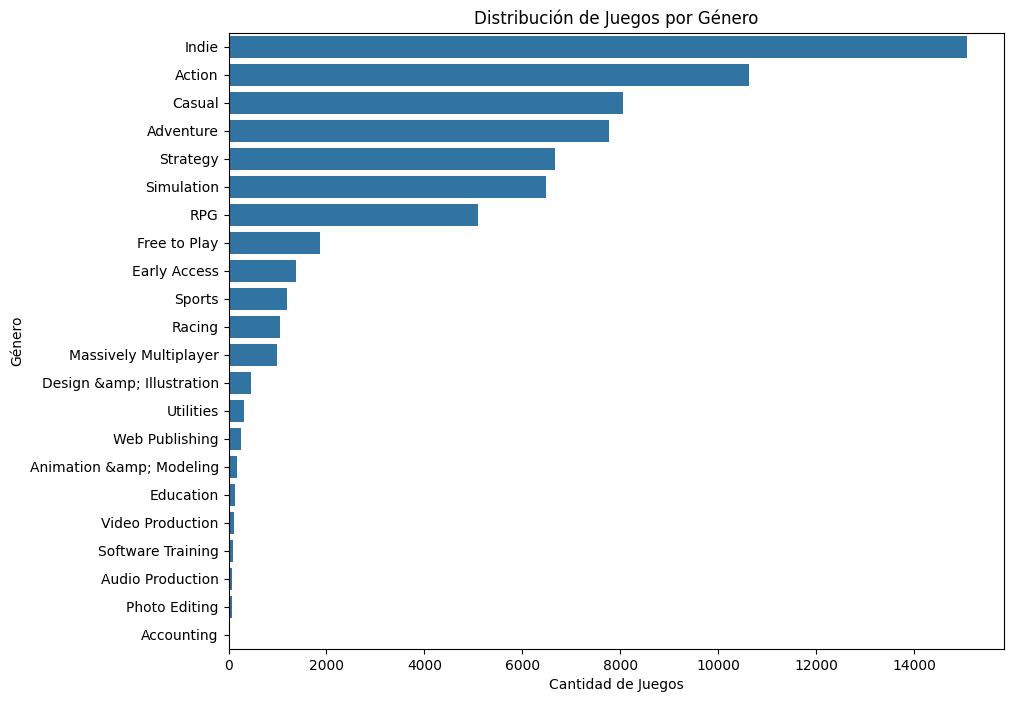

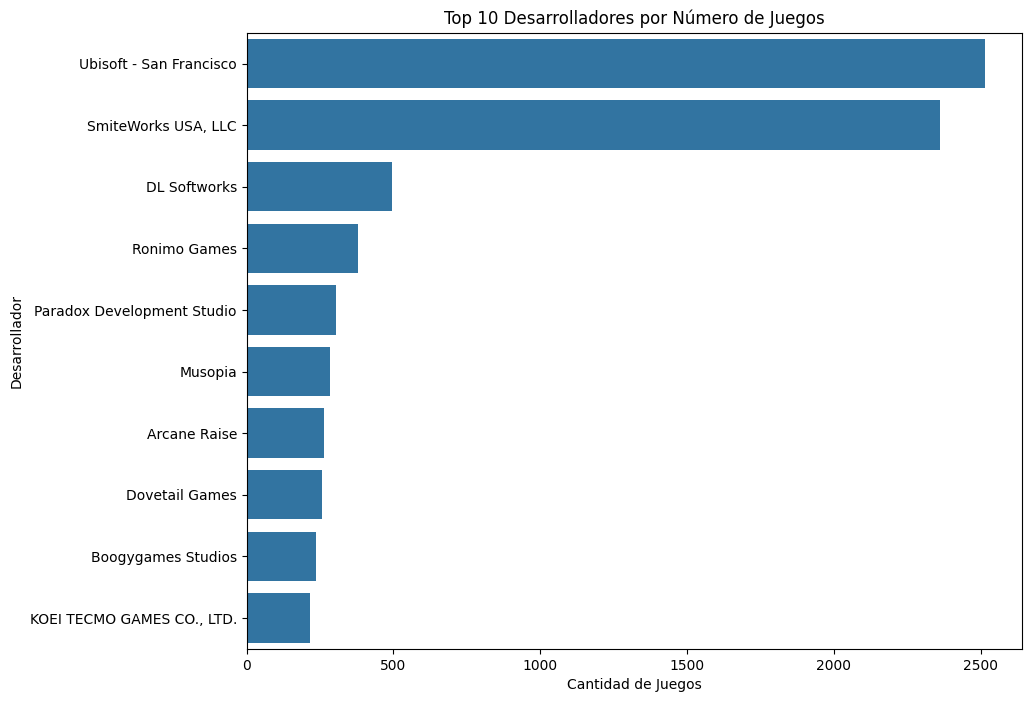

In [3]:


# Asumiendo que 'genres' y 'developer' son columnas separadas y que un juego puede estar en múltiples filas si tiene múltiples géneros

# Distribución de juegos por género
plt.figure(figsize=(10, 8))
sns.countplot(y='genres', data=steam_games,
              order=steam_games['genres'].value_counts().index)
plt.title('Distribución de Juegos por Género')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Género')
plt.show()

# Distribución de juegos por desarrollador (mostrando los top 10)
top_developers = steam_games['developer'].value_counts().head(10)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_developers, y=top_developers.index)
plt.title('Top 10 Desarrolladores por Número de Juegos')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Desarrollador')
plt.show()

### 2. Tendencias de lanzamiento a lo largo del tiempo


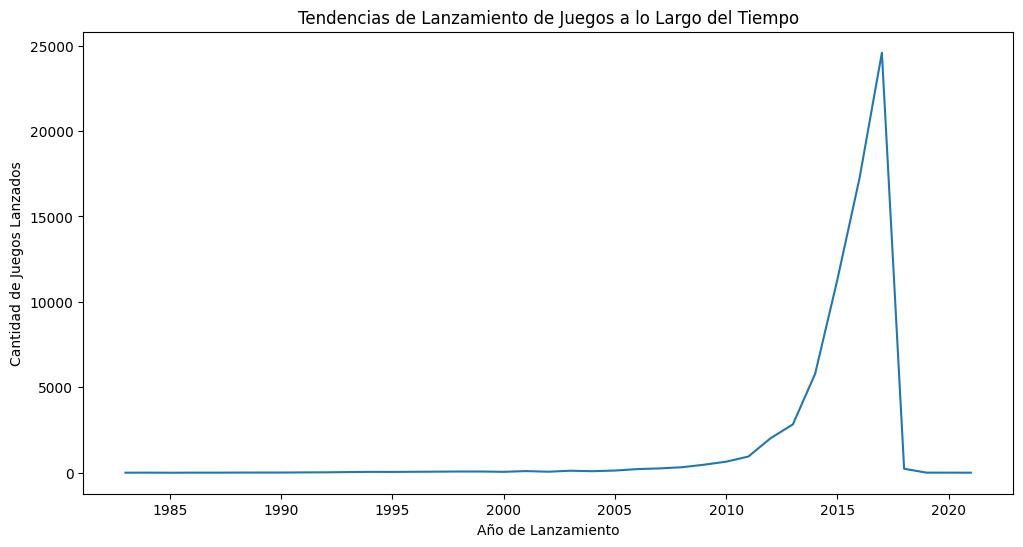

In [4]:
# Conversión de 'release_date' a datetime
steam_games['release_date'] = pd.to_datetime(steam_games['release_date'])

# Extracción del año de la fecha de lanzamiento
steam_games['release_year'] = steam_games['release_date'].dt.year

# Tendencias de lanzamiento a lo largo del tiempo
plt.figure(figsize=(12, 6))
steam_games.groupby('release_year').size().plot(kind='line')
plt.title('Tendencias de Lanzamiento de Juegos a lo Largo del Tiempo')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos Lanzados')
plt.show()

### 3. Análisis de precios: distribución de precios y relación entre precio y género

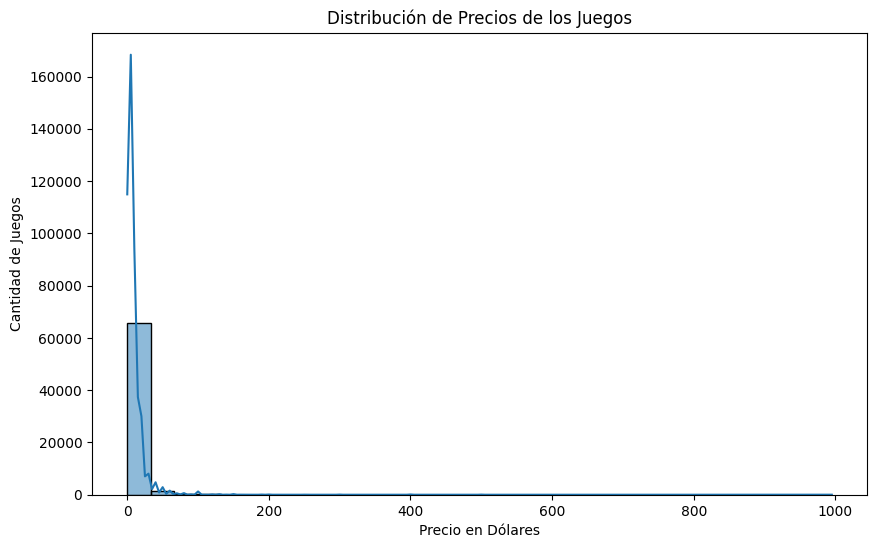

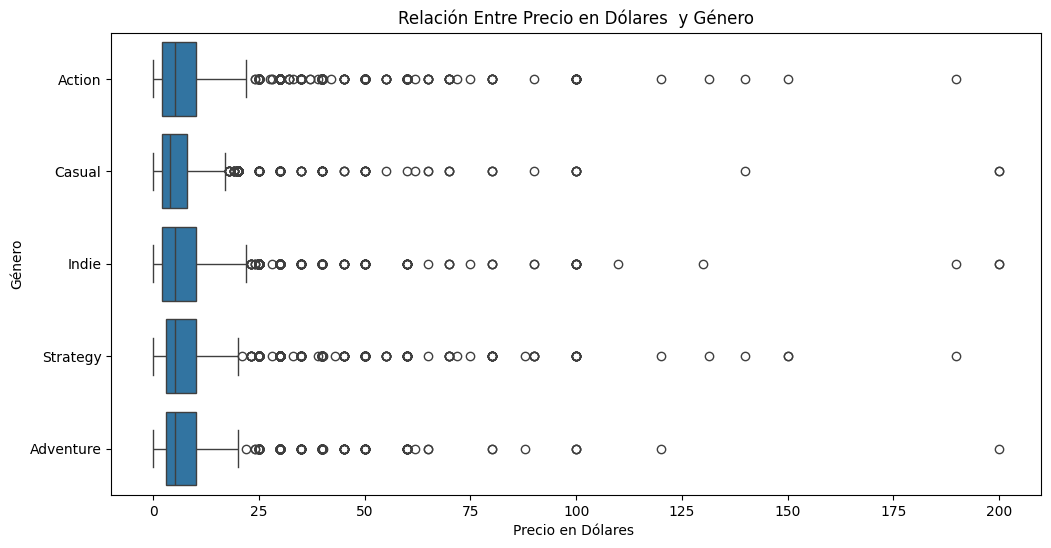

In [29]:
# Distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(steam_games['price'], bins=30, kde=True)
plt.title('Distribución de Precios de los Juegos')
plt.xlabel('Precio en Dólares')
plt.ylabel('Cantidad de Juegos')
plt.show()

# Relación entre Precio en Dolares y género (considerando los géneros más comunes para simplificar)
top_genres = steam_games['genres'].value_counts().head(5).index
filtered_data = steam_games[steam_games['genres'].isin(top_genres)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='genres', data=filtered_data)
plt.title('Relación Entre Precio en Dólares  y Género')
plt.xlabel('Precio en Dólares ')
plt.ylabel('Género')
plt.show()

## Análisis de `user_reviews`



### 1. Distribución del análisis de sentimientos y su relación con la recomendación

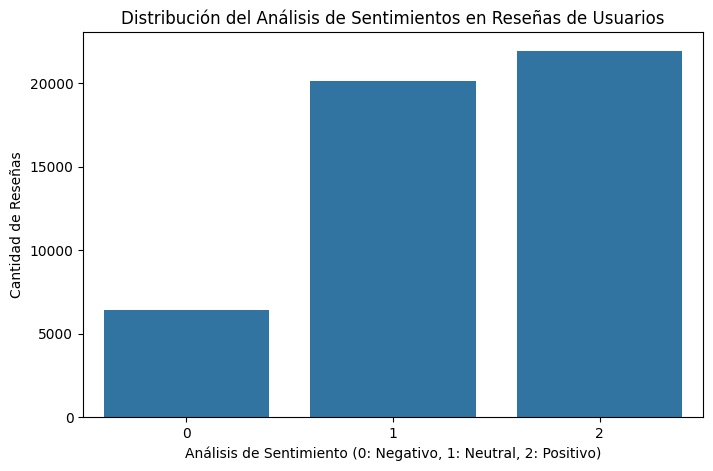

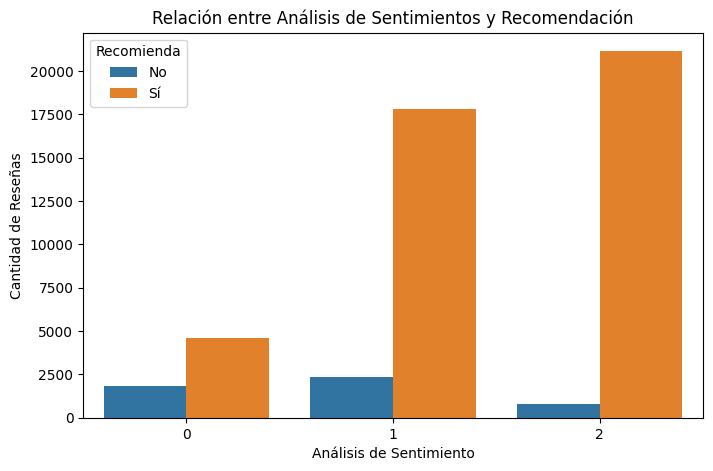

In [6]:
# Distribución del análisis de sentimientos
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_analysis', data=user_reviews)
plt.title('Distribución del Análisis de Sentimientos en Reseñas de Usuarios')
plt.xlabel('Análisis de Sentimiento (0: Negativo, 1: Neutral, 2: Positivo)')
plt.ylabel('Cantidad de Reseñas')
plt.show()

# Relación entre el análisis de sentimientos y la recomendación
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_analysis', hue='recommend', data=user_reviews)
plt.title('Relación entre Análisis de Sentimientos y Recomendación')
plt.xlabel('Análisis de Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.legend(title='Recomienda', labels=['No', 'Sí'])
plt.show()

### 2. Análisis de tendencias temporales en las reseñas y sentimientos a lo largo de los años

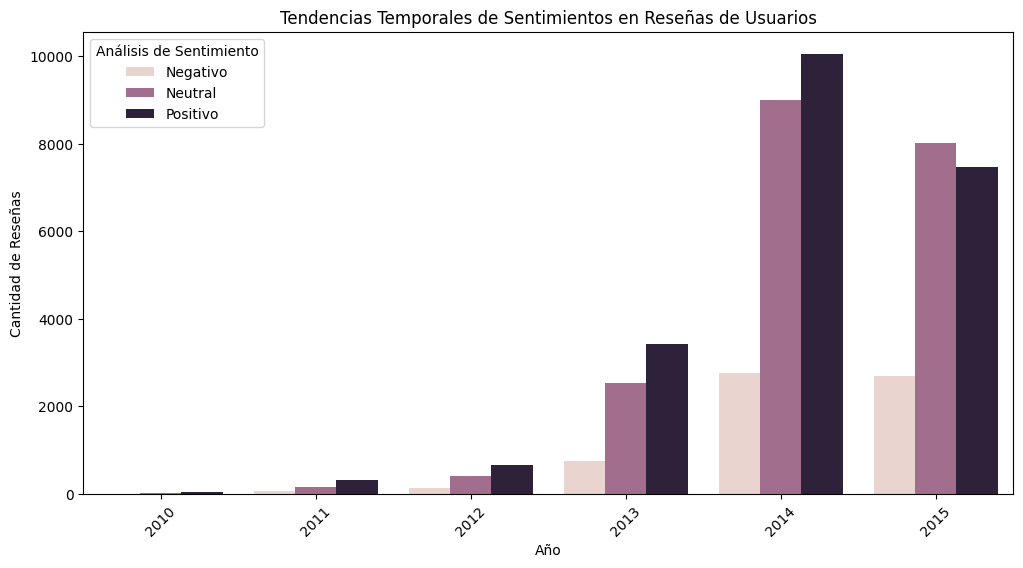

In [7]:
# Asegurándonos de que 'year' es un entero
user_reviews['year'] = user_reviews['year'].astype(int)

# Tendencias temporales de sentimientos a lo largo de los años
plt.figure(figsize=(12, 6))
sns.countplot(x='year', hue='sentiment_analysis', data=user_reviews)
plt.title('Tendencias Temporales de Sentimientos en Reseñas de Usuarios')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reseñas')
plt.legend(title='Análisis de Sentimiento', labels=[
           'Negativo', 'Neutral', 'Positivo'])
plt.xticks(rotation=45)
plt.show()

### 3. Análisis de palabras frecuentes en las reseñas utilizando técnicas de NLP

[nltk_data] Downloading package punkt to /home/c-/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/c-/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


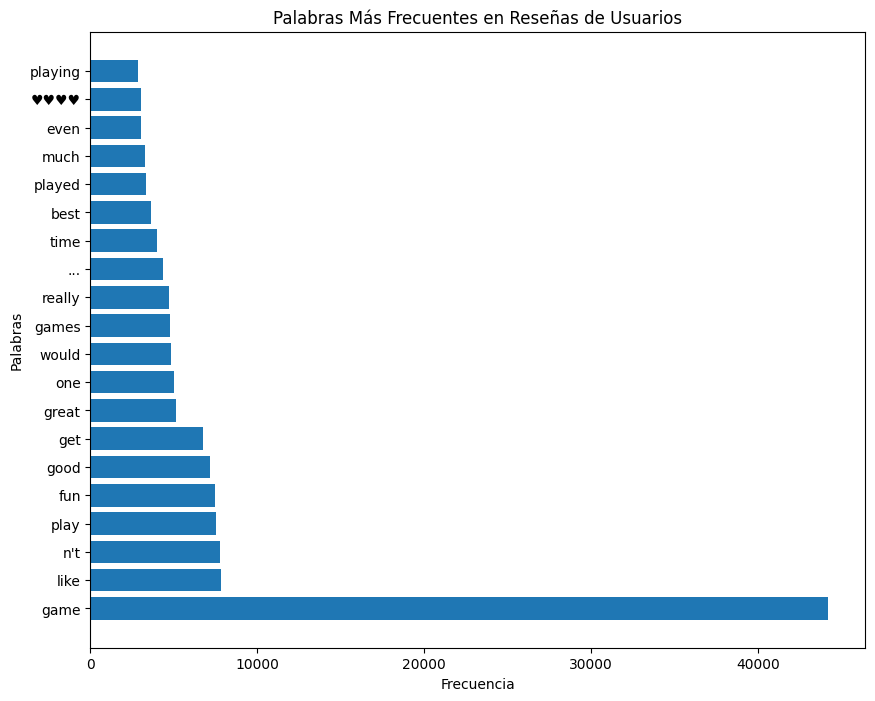

In [8]:

# Descargar las stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Concatenar todas las reseñas en una sola cadena de texto
all_reviews = ' '.join(user_reviews['review'].dropna())

# Tokenizar las reseñas
tokens = word_tokenize(all_reviews)

# Filtrar stopwords y palabras con longitud menor a 3
filtered_tokens = [word for word in tokens if word.lower(
) not in stopwords.words('english') and len(word) > 2]

# Contar y mostrar las palabras más comunes
word_counts = Counter(filtered_tokens)
most_common_words = word_counts.most_common(20)

# Visualizar las palabras más comunes
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 8))
plt.barh(words, counts)
plt.title('Palabras Más Frecuentes en Reseñas de Usuarios')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.show()

## Análisis de `users_items`

### 1. Distribución del tiempo de juego (`playtime_forever`)

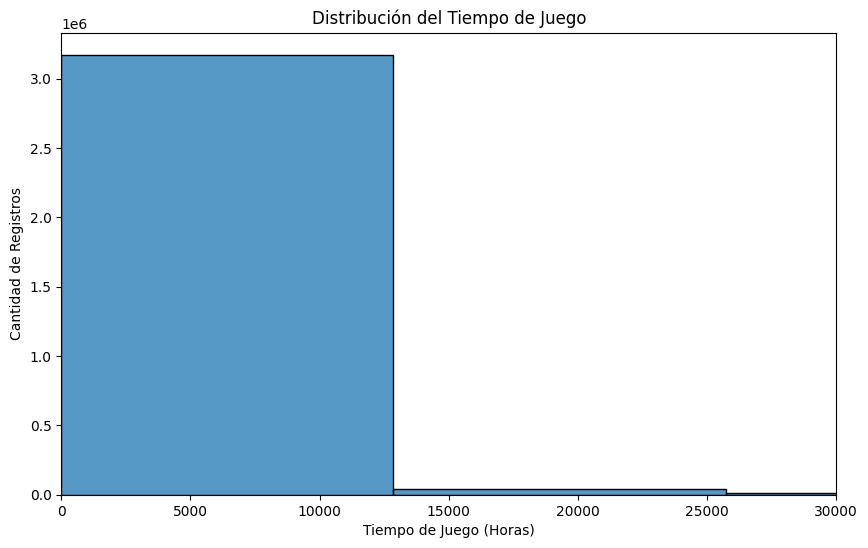

In [19]:
# Distribución del tiempo de juego (playtime_forever)
plt.figure(figsize=(10, 6))
sns.histplot(users_items['playtime_forever'], bins=50)
plt.title('Distribución del Tiempo de Juego')
plt.xlabel('Tiempo de Juego (Horas)')
plt.ylabel('Cantidad de Registros')
# Limitando la escala del eje x hasta 30000 horas
plt.xlim(0, 30000)  # Limitando el eje x hasta 30000 horas
plt.show()

### 2. Relación entre tiempo de juego y género de juegos

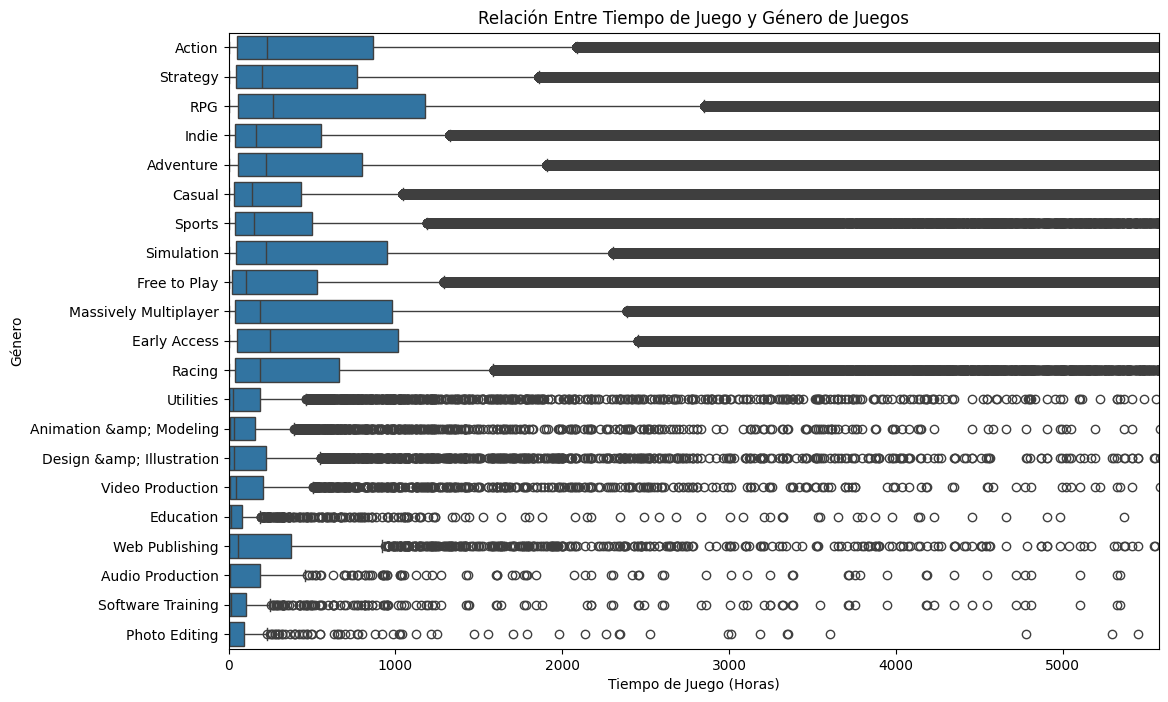

In [10]:
combined_data = users_items.merge(
    steam_games, left_on='item_id', right_on='id', how='left')
plt.figure(figsize=(12, 8))
sns.boxplot(x='playtime_forever', y='genres', data=combined_data)
plt.title('Relación Entre Tiempo de Juego y Género de Juegos')
plt.xlabel('Tiempo de Juego (Horas)')
plt.ylabel('Género')
# Limitando a 95% para mejor visualización
plt.xlim(0, combined_data['playtime_forever'].quantile(0.95))
plt.show()

### 3. Usuarios con mayor tiempo de juego y su distribución entre diferentes juegos

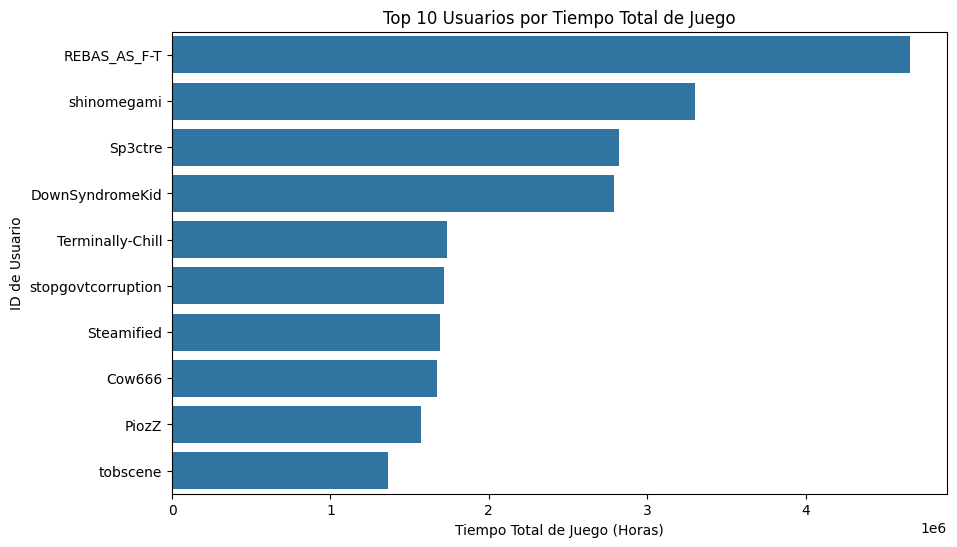

In [11]:
# Suma de tiempo de juego por usuario
user_playtime = users_items.groupby(
    'user_id')['playtime_forever'].sum().reset_index()

# Ordenar por tiempo de juego para obtener los usuarios con más tiempo
top_users = user_playtime.sort_values(
    by='playtime_forever', ascending=False).head(10)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x='playtime_forever', y='user_id', data=top_users, orient='h')
plt.title('Top 10 Usuarios por Tiempo Total de Juego')
plt.xlabel('Tiempo Total de Juego (Horas)')
plt.ylabel('ID de Usuario')
plt.show()

# Reporte de Análisis Exploratorio de Datos (EDA) para Steam

## Resumen Ejecutivo

Este reporte presenta un análisis exploratorio de datos (EDA) exhaustivo basado en tres conjuntos de datos principales de Steam: `steam_games`, `user_reviews`, y `users_items`. El objetivo es comprender las dinámicas de interacción entre juegos, desarrolladores, y usuarios, así como extraer insights relevantes que puedan informar decisiones estratégicas y operacionales. Se abordaron aspectos como la existencia de valores nulos, estadísticas descriptivas de variables clave, distribución de juegos por género y desarrollador, tendencias de lanzamiento, análisis de precios, distribución del análisis de sentimientos en reseñas, y la relación entre el tiempo de juego y diversos factores.

## Hallazgos Clave


### Estadísticas Descriptivas

- **Precio**: El precio promedio de los juegos es de 8.84 USD, con un rango que va desde juegos gratuitos hasta uno máximo de 995 USD, reflejando una amplia diversidad en la oferta de juegos.
- **Tiempo de Juego**: El tiempo de juego promedio es de 1554.28 horas, evidenciando un compromiso significativo de los usuarios con los juegos en la plataforma.
- **Análisis de Sentimientos en Reseñas**: La puntuación promedio de 1.32 sugiere una inclinación hacia reseñas positivas/neutrales, con un 45.25% de reseñas calificadas como positivas.

### Outliers 

- En los datos de `users_items` la variable playtime_forever contenia outliers altamente visibles,al igual que la variable `price` en `steam_games`, no se trataron debido a que en la realidad, estos datos pueden permitirse esta variabilidad.

### Palabras mas frecuentes en las reviews:

- La palabra mas frecuente fue "game" pero para poder extraer una conclusion podemos ver las otras palabras que le preceden como "like", "fun", "good" , "great" lo que da mas soporte a que las reseñas fueron en su mayoria positivas.


### Análisis por Categorías

- **Géneros Populares**: Los géneros más populares incluyen Indie, Action, y Casual, representando más del 49% de todos los juegos, lo que subraya la popularidad de estos géneros entre los desarrolladores y usuarios.
- **Desarrolladores Principales**: Ubisoft - San Francisco emerge como el desarrollador con más juegos, seguido por SmiteWorks USA, LLC, y DL Softworks, destacando la diversidad y la amplia participación de desarrolladores en la plataforma.

